In [23]:
import os.path as path
import numpy as np
import seaborn as sns
import pandas as pd
from yass.explore import RecordingExplorer
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
LOCAL_PATH = '/Users/Edu/data/yass'
REMOTE_PATH = '/ssd/data/eduardo/'

LOCAL = False

PATH = LOCAL_PATH if LOCAL else REMOTE_PATH

OLD = path.join(PATH, 'old-threshold')
NEW = path.join(PATH, 'new-threshold')

In [4]:
OLD = path.join(PATH, 'old-nnet')
NEW = path.join(PATH, 'new-nnet')

In [5]:
def n_groups(spike_train):
    return len(np.unique(spike_train[:, 1]))

def groups(spike_train):
    return np.unique(clear_new[:, 1], return_counts=True)

In [6]:
OLD, NEW

('/ssd/data/eduardo/old-nnet', '/ssd/data/eduardo/new-nnet')

In [7]:
clear_old = np.load(path.join(OLD, 'spike_index_clear.npy'))
clear_new = np.load(path.join(NEW, 'spike_index_clear.npy'))

In [8]:
clear_old.shape, clear_new.shape

((103459, 2), (109861, 2))

In [9]:
old = pd.DataFrame(clear_old, columns=['time_old', 'main_channel_old'])
new = pd.DataFrame(clear_new, columns=['time_new', 'main_channel_new'])

In [27]:
new.head(10)

,time_new,main_channel_new
0,132,21
1,186,6
2,187,23
3,242,16
4,356,9
5,402,20
6,404,9
7,431,10
8,433,7
9,551,13


In [26]:
old.head(10)

,time_old,main_channel_old
0,11,16
1,11,28
2,132,21
3,186,6
4,187,23
5,242,16
6,356,9
7,373,15
8,431,10
9,551,13


In [11]:
both = old.merge(new, how='left', left_on=['time_old', 'main_channel_old'], right_on=['time_new', 'main_channel_new'])

In [12]:
len(both)

103459

In [13]:
both[both.time_new.isna()].head()

,time_old,main_channel_old,time_new,main_channel_new
0,11,16,NaN,NaN
1,11,28,NaN,NaN
7,373,15,NaN,NaN
15,949,17,NaN,NaN
26,1460,2,NaN,NaN


In [14]:
# diff...
len(both[both.time_new.isna()])

11968

In [15]:
both2 = old.merge(new, how='right', left_on=['time_old', 'main_channel_old'], right_on=['time_new', 'main_channel_new'])

In [16]:
len(both2)

109861

In [17]:
both2[both2.time_new.isna()]

,time_old,main_channel_old,time_new,main_channel_new


In [18]:
len(both2[both2.time_new.isna()].head())

0

In [19]:
e = RecordingExplorer(path.join(PATH, 'new-nnet/standarized.bin'),
                      path.join(PATH, 'ej49_geometry1.txt'),
                      spike_size=15, neighbor_radius=70,
                      dtype='float32', n_channels=49,
                      data_format='long')

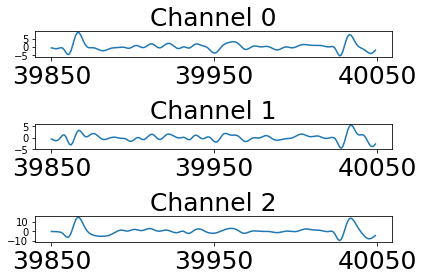

In [20]:
e.plot_series(39950-100, 39950+100, channels=[0, 1, 2])

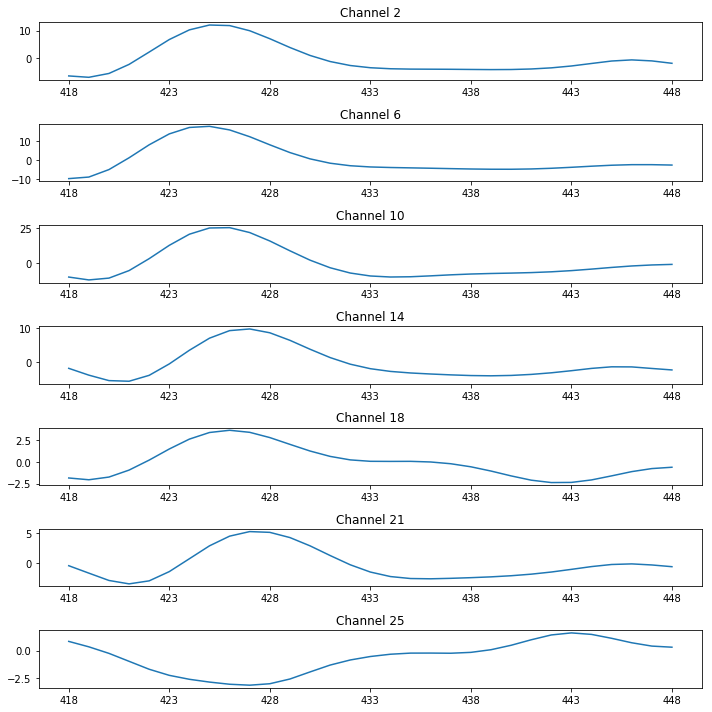

In [35]:
e.plot_waveform_around_main_channel(time=433)

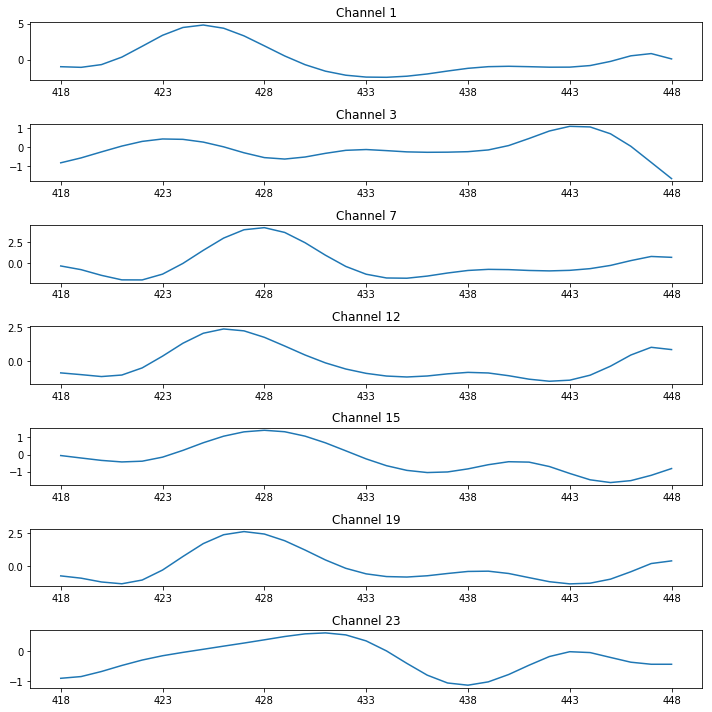

In [34]:
e.plot_waveform_around_channel(time=433, channel=7)

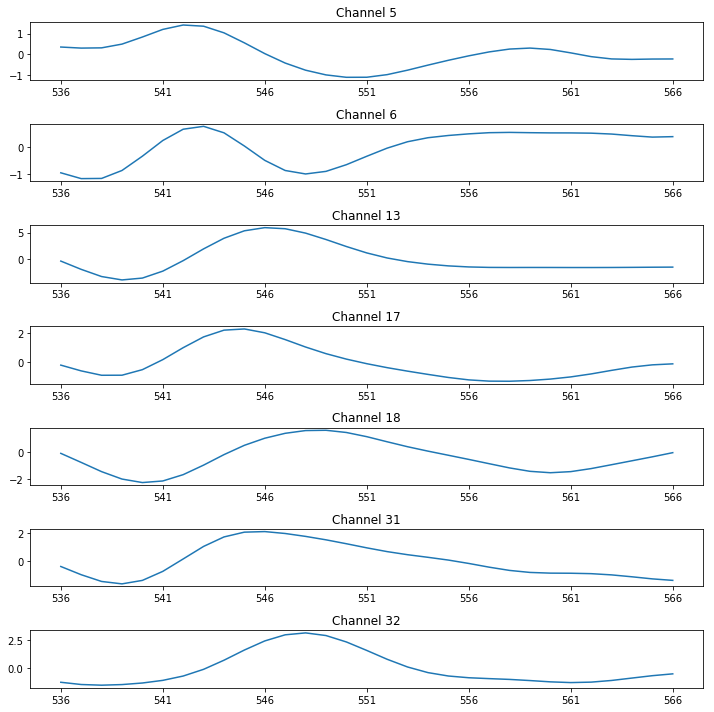

In [33]:
e.plot_waveform_around_main_channel(time=551)

In [188]:
wfs = e.read_waveforms(clear_new[:, 0])

In [189]:
main_ch = e.main_channel_for_waveforms(wfs)

In [202]:
wfs_max_main = [np.max(wfs[i, :, main_ch[i]]) for i in range(len(wfs))]
np.mean(wfs_max_main)

14.734309

In [209]:
wfs_old = e.read_waveforms(clear_old[np.logical_and(clear_old[:, 0] > 15, clear_old[:, 0] < 6E6), 0])

In [210]:
main_ch = e.main_channel_for_waveforms(wfs_old)
wfs_max_main = [np.max(wfs[i, :, main_ch[i]]) for i in range(len(wfs))]
np.mean(wfs_max_main)

2.9886262

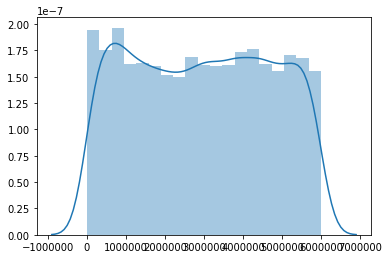

In [411]:
sns.distplot(old_main0)

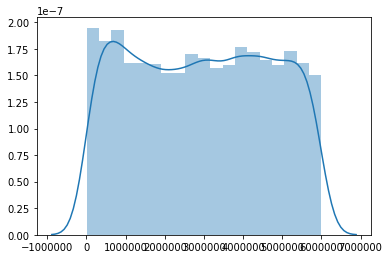

In [412]:
sns.distplot(new_main0)

In [415]:
col_old = np.load(path.join(OLD, 'spike_index_collision.npy'))
col_new = np.load(path.join(NEW, 'spike_index_collision.npy'))

In [416]:
col_old.shape, col_new.shape

((436477, 2), (443165, 2))

In [417]:
n_groups(col_old), n_groups(col_new)

(49, 49)

In [418]:
col_old[:10,]

array([[11,  3],
       [11, 20],
       [11, 25],
       [11, 31],
       [11, 45],
       [22, 18],
       [28, 46],
       [57, 43],
       [64, 46],
       [65, 39]], dtype=int32)

In [419]:
col_new[:10,]

array([[ 22,  18],
       [ 28,  46],
       [ 57,  43],
       [ 64,  46],
       [ 65,  39],
       [ 79,  39],
       [ 81,  32],
       [ 83,  38],
       [ 84,   4],
       [185,  40]])

In [420]:
old_train = np.load(path.join(OLD, 'spike_train.npy'))
new_train = np.load(path.join(NEW, 'spike_train.npy'))

In [421]:
old_train.shape, new_train.shape

((279151, 2), (664713, 2))

In [422]:
n_groups(old_train), n_groups(new_train)

(76, 86)